# Karthika Pai

# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
#import statements
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
def create_dataframe(location):
    '''
    Function takes name of directory, iterates through all files of that directory, scrapes the requested
    data and returns a dataframe. 
    This function only works with the USDA dataset provided to us.
    Input: directory name as string
    Output: dataframe
    '''
    df = pd.DataFrame(columns=('type', 'food', 'form', 
                               'price_per_lb', 'yield', 'lb_per_cup', 'price_per_cup')) #create empty dataframe
    filename_array = [] #this array will list the files that have a fresh1 row
    for files in os.listdir(location):
        data = pd.read_excel(location+files, skiprows = 1, usecols=(0,1,3,4,6))
        data.columns = ['form', 'price_per_lb', 'yield', 
                          'lb_per_cup', 'price_per_cup'] #rename the columns so can be added to empty dataframe above
        k = data.loc[data['form'].str.startswith('Fresh1') == 1] #get row that start with fresh1
        if not k.empty:
            filename_array.append(files) #append filename only if file has fresh1 column
        df = df.append(k) #apend row to dataframe
        df['type'] = location[19:-1] #get type of food from location with string slicing
    df['food'] = [filename[:-5] for filename in filename_array] #slice file names to get name of good
    df.index = range(1, len(df.values)+1) #index starting from 1
    return df

directory = './assignment3_data/fruit/'
fruit_df = create_dataframe(directory)
fruit_df

,food,form,lb_per_cup,price_per_cup,price_per_lb,type,yield
1,apples,Fresh1,0.242508,0.422373,1.56752,fruit,0.9
2,apricots,Fresh1,0.363763,1.1891,3.04007,fruit,0.93
3,bananas,Fresh1,0.330693,0.292965,0.566983,fruit,0.64
4,blackberries,Fresh1,0.31967,1.92292,5.77471,fruit,0.96
5,blueberries,Fresh1,0.31967,1.59318,4.73462,fruit,0.95
6,cantaloupe,Fresh1,0.374786,0.3938,0.535874,fruit,0.51
7,cherries,Fresh1,0.341717,1.33455,3.59299,fruit,0.92
8,grapefruit,Fresh1,0.462971,0.848278,0.897802,fruit,0.49
9,grapes,Fresh1,0.330693,0.721266,2.09383,fruit,0.96
10,honeydew,Fresh1,0.374786,0.649077,0.796656,fruit,0.46


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [3]:
veg_directory = './assignment3_data/vegetables/' #get from vegetable directory
veg_df = create_dataframe(veg_directory)
veg_df

,food,form,lb_per_cup,price_per_cup,price_per_lb,type,yield
1,acorn_squash,Fresh1,0.451948,1.15536,1.17225,vegetables,0.458554
2,artichoke,Fresh1,0.385809,2.27497,2.21305,vegetables,0.375309
3,asparagus,Fresh1,0.396832,2.58227,3.21349,vegetables,0.493835
4,avocados,Fresh1,0.31967,0.964886,2.23587,vegetables,0.740753
5,brussels_sprouts,Fresh1,0.341717,0.890898,2.76355,vegetables,1.06
6,butternut_squash,Fresh1,0.451948,0.787893,1.24474,vegetables,0.714
7,cauliflower,Fresh1,,NaN,,vegetables,
8,celery,Fresh1,NaN,NaN,NaN,vegetables,NaN
9,collard_greens,Fresh1,0.286601,0.650001,2.63084,vegetables,1.16
10,corn_sweet,Fresh1,0.363763,1.8125,2.69062,vegetables,0.54


<b> We cannot extract the right price or any price for tomatos, because the fresh row contains 3 subrows, because there are 3 types of tomatoes. If we want to extract a price for the three types of tomatoes, we would have to write a special if clause inside the for loop that checks whether the file is a tomato.xlsx file and gets the roma, beefstake, grape and cherry row information. This is important because the data we get in the real world is never going to be uniform. We cannot expect all our data in this dataset to always have a 'Fresh1' row. The asparagus.xlsx and other files do not have this property, so the rows for them is all correct.  <b>

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [15]:
veg_with_price = veg_df[veg_df.price_per_cup.notnull()] # get only rows that have price in veg_df
veg_with_price # vegetables with null values removed

,food,form,lb_per_cup,price_per_cup,price_per_lb,type,yield
1,acorn_squash,Fresh1,0.451948,1.15536,1.17225,vegetables,0.458554
2,artichoke,Fresh1,0.385809,2.27497,2.21305,vegetables,0.375309
3,asparagus,Fresh1,0.396832,2.58227,3.21349,vegetables,0.493835
4,avocados,Fresh1,0.31967,0.964886,2.23587,vegetables,0.740753
5,brussels_sprouts,Fresh1,0.341717,0.890898,2.76355,vegetables,1.06
6,butternut_squash,Fresh1,0.451948,0.787893,1.24474,vegetables,0.714
9,collard_greens,Fresh1,0.286601,0.650001,2.63084,vegetables,1.16
10,corn_sweet,Fresh1,0.363763,1.8125,2.69062,vegetables,0.54
11,green_beans,Fresh1,0.275578,0.696606,2.13997,vegetables,0.846575
12,green_peppers,Fresh1,0.264555,0.455022,1.41036,vegetables,0.82


In [16]:
final_df = veg_with_price.append(fruit_df) #append fruit_df to veg_with_price df, combine both dfs together
final_df # final fruit and vegetable row

,food,form,lb_per_cup,price_per_cup,price_per_lb,type,yield
1,acorn_squash,Fresh1,0.451948,1.15536,1.17225,vegetables,0.458554
2,artichoke,Fresh1,0.385809,2.27497,2.21305,vegetables,0.375309
3,asparagus,Fresh1,0.396832,2.58227,3.21349,vegetables,0.493835
4,avocados,Fresh1,0.31967,0.964886,2.23587,vegetables,0.740753
5,brussels_sprouts,Fresh1,0.341717,0.890898,2.76355,vegetables,1.06
6,butternut_squash,Fresh1,0.451948,0.787893,1.24474,vegetables,0.714
9,collard_greens,Fresh1,0.286601,0.650001,2.63084,vegetables,1.16
10,corn_sweet,Fresh1,0.363763,1.8125,2.69062,vegetables,0.54
11,green_beans,Fresh1,0.275578,0.696606,2.13997,vegetables,0.846575
12,green_peppers,Fresh1,0.264555,0.455022,1.41036,vegetables,0.82


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [5]:
fruit_df #fruits

,food,form,lb_per_cup,price_per_cup,price_per_lb,type,yield
1,apples,Fresh1,0.242508,0.422373,1.56752,fruit,0.9
2,apricots,Fresh1,0.363763,1.1891,3.04007,fruit,0.93
3,bananas,Fresh1,0.330693,0.292965,0.566983,fruit,0.64
4,blackberries,Fresh1,0.31967,1.92292,5.77471,fruit,0.96
5,blueberries,Fresh1,0.31967,1.59318,4.73462,fruit,0.95
6,cantaloupe,Fresh1,0.374786,0.3938,0.535874,fruit,0.51
7,cherries,Fresh1,0.341717,1.33455,3.59299,fruit,0.92
8,grapefruit,Fresh1,0.462971,0.848278,0.897802,fruit,0.49
9,grapes,Fresh1,0.330693,0.721266,2.09383,fruit,0.96
10,honeydew,Fresh1,0.374786,0.649077,0.796656,fruit,0.46


In [20]:
veg_with_price# vegetables with null values removed

,food,form,lb_per_cup,price_per_cup,price_per_lb,type,yield
1,acorn_squash,Fresh1,0.451948,1.15536,1.17225,vegetables,0.458554
2,artichoke,Fresh1,0.385809,2.27497,2.21305,vegetables,0.375309
3,asparagus,Fresh1,0.396832,2.58227,3.21349,vegetables,0.493835
4,avocados,Fresh1,0.31967,0.964886,2.23587,vegetables,0.740753
5,brussels_sprouts,Fresh1,0.341717,0.890898,2.76355,vegetables,1.06
6,butternut_squash,Fresh1,0.451948,0.787893,1.24474,vegetables,0.714
9,collard_greens,Fresh1,0.286601,0.650001,2.63084,vegetables,1.16
10,corn_sweet,Fresh1,0.363763,1.8125,2.69062,vegetables,0.54
11,green_beans,Fresh1,0.275578,0.696606,2.13997,vegetables,0.846575
12,green_peppers,Fresh1,0.264555,0.455022,1.41036,vegetables,0.82


In [7]:
final_df #final dataframe with fruit and vegetable wash
final_df.reset_index(drop=True, inplace=True) #reset index
final_df.index = final_df.index + 1 #start from 1

final_df

,food,form,lb_per_cup,price_per_cup,price_per_lb,type,yield
1,acorn_squash,Fresh1,0.451948,1.15536,1.17225,vegetables,0.458554
2,artichoke,Fresh1,0.385809,2.27497,2.21305,vegetables,0.375309
3,asparagus,Fresh1,0.396832,2.58227,3.21349,vegetables,0.493835
4,avocados,Fresh1,0.31967,0.964886,2.23587,vegetables,0.740753
5,brussels_sprouts,Fresh1,0.341717,0.890898,2.76355,vegetables,1.06
6,butternut_squash,Fresh1,0.451948,0.787893,1.24474,vegetables,0.714
7,collard_greens,Fresh1,0.286601,0.650001,2.63084,vegetables,1.16
8,corn_sweet,Fresh1,0.363763,1.8125,2.69062,vegetables,0.54
9,green_beans,Fresh1,0.275578,0.696606,2.13997,vegetables,0.846575
10,green_peppers,Fresh1,0.264555,0.455022,1.41036,vegetables,0.82


<b> For the final question, I will be using these three dataframes above <b>

<h3> What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive? <h3>


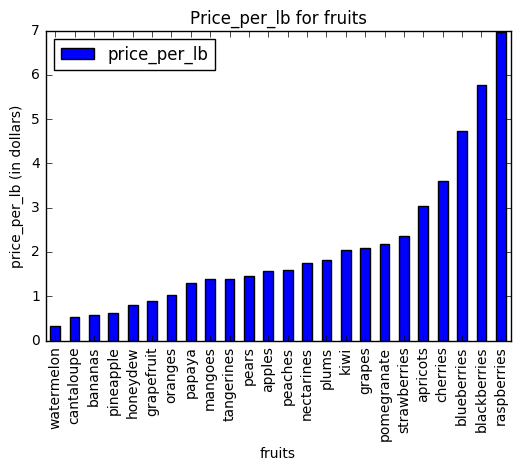

In [8]:
fruit_expensive = fruit_df.sort_values('price_per_lb') #sort by price_per_lb, ascending
k = fruit_expensive.plot(x='food', y='price_per_lb', kind='bar', title = 'Price_per_lb for fruits')
k.set_xlabel("fruits")
k.set_ylabel("price_per_lb (in dollars)") #set axis, title names
plt.show()

<b> Raspberries are the most expensive per pound and watermelons are the least expensive per pound. Blackberries and blueberries also seem to be very expensive. On the other side of the graph, watermelon, cantelope and bananas seem to be the least expensive per pound. <b>

<h3> How do the price distributions compare for fruit and vegetables? <h3>

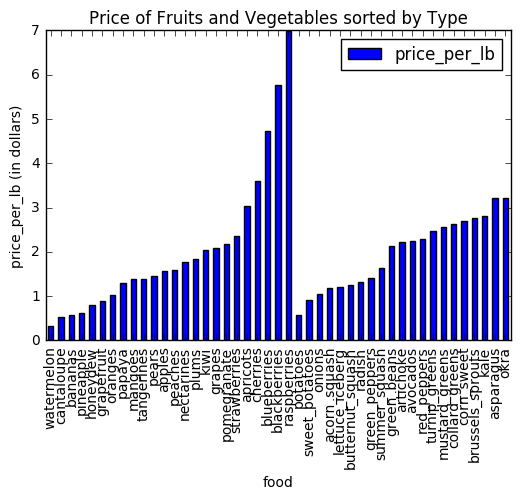

In [9]:
price_distribution= final_df.sort_values(['type', 'price_per_lb']) #sort by type first, then by ascending price
k = price_distribution.plot(x='food', y='price_per_lb', kind='bar', 
              title='Price of Fruits and Vegetables sorted by Type',
              sort_columns=True)
k.set_xlabel("food")
k.set_ylabel("price_per_lb (in dollars)") #set axis, title names
plt.show()

<b> The above chart shows the combined dataset of final (that is - fruit and vegetable values). The columns in the chart are sorted by type and price_per_lb. You can observe that there is a huge variance between the most expensive fruit and the least expensive fruit compared to the most expensive vegetable(okra) and the least expensive vegetable (potatoes). It seems to me, in general, that the price distribution for vegetables is much more "stable" than the price distribution for fruits, which vary widely, especially as the fruits get more and more expensive quickly <b>

<h3> Which foods are the best value for the price? <h3>

<b> To compute best value, I'm looking at 2 factors: the price per cup and yield/preparation yield factor (which is the percentage of food you can eat after it has been processed). A best value food will have high yield and low prices. One way to do this is to make a new category, named values, and make the value column equal to the price_per_cup divided by the yield. Because we want high yield and low prices, the best value would be indicated by the food that has the lowest values rating (we want the denominator to be much larger than the numerator) <b>

In [10]:
value_df = final_df.copy(deep=True) #deep copy to not affect original array

value_df['values'] = value_df['price_per_cup']/value_df['yield'] #add column to value_df that divides price over yield
value_df = value_df.sort_values('values') #sort by value column
value_df

,food,form,lb_per_cup,price_per_cup,price_per_lb,type,yield,values
16,potatoes,Fresh1,0.264555,0.184017,0.56432,vegetables,0.811301,0.226818
12,lettuce_iceberg,Fresh1,0.242508,0.309655,1.21304,vegetables,0.95,0.325953
45,watermelon,Fresh1,0.330693,0.212033,0.333412,fruit,0.52,0.407756
17,radish,Fresh1,0.275578,0.401618,1.31163,vegetables,0.9,0.446242
15,onions,Fresh1,0.35274,0.406868,1.03811,vegetables,0.9,0.452076
24,bananas,Fresh1,0.330693,0.292965,0.566983,fruit,0.64,0.457758
22,apples,Fresh1,0.242508,0.422373,1.56752,fruit,0.9,0.469303
10,green_peppers,Fresh1,0.264555,0.455022,1.41036,vegetables,0.82,0.554905
7,collard_greens,Fresh1,0.286601,0.650001,2.63084,vegetables,1.16,0.560345
37,peaches,Fresh1,0.341717,0.56639,1.59119,fruit,0.96,0.58999


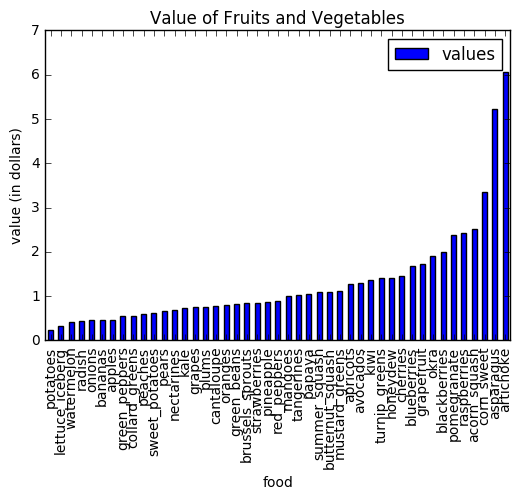

In [11]:
k = value_df.plot(x='food', y='values', kind='bar', title = 'Value of Fruits and Vegetables', sort_columns=True)
k.set_xlabel("food")
k.set_ylabel("value (in dollars)") #name title, axis
plt.show()

<b>For a food to be considered high value, it needs to be close to 0 as possible. Thus, the high value foods are potatoes, iceberg lettuce, watermelons and radishes. The least value foods are artichokes, asparagus and sweet corn. </b>

<h3> What's something surprising about this data set? <h3>

In [12]:
print 'Summary stats for fruit (price_per_lib)'
summary_fruit = pd.to_numeric(fruit_df['price_per_lb']) #change dtype from object to numeric so we can get mean
print summary_fruit.describe() #get summary stats
print '\nSummary stats for fruit (price_per_lib)'
summary_veg = pd.to_numeric(veg_with_price['price_per_lb']) #change dtype from object to numeric so we can get mean
print summary_veg.describe()#get summary stats

Summary stats for fruit (price_per_lib)
count    24.000000
mean      2.076877
std       1.675687
min       0.333412
25%       1.000830
50%       1.579351
75%       2.219895
max       6.975811
Name: price_per_lb, dtype: float64

Summary stats for fruit (price_per_lib)
count    21.000000
mean      1.987619
std       0.799305
min       0.564320
25%       1.244737
50%       2.213050
75%       2.630838
max       3.213552
Name: price_per_lb, dtype: float64


<b> One surprising thing I found out about this dataset is the fact that the mean price per pound of fruits were higher than mean price per pound of vegetables - about 4.5% higher. I did some research to find out why this was the case and I found three reasons:

1. There is a perception that fruits are more "cool" or enjoyable to eat than vegetables. Media is ripe with accounts of children refusing to eat their brussels sprouts.
2. Most fruits have seasonal availability. They usually come at a very high price because of this, which reduces as its peak season arrives. Many fruits grow well only in certain regions and must be transported from far off regions, while most vegetables are produced and sold locally.
3. Most vegetables require cooking to eat, while most fruits can be eaten right out of the bag. <b>


<h3> Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis. <h3>

<b> Since we don't have data with information about nutrition - calories, vitamins, minerals etc - it is impossible to determine which foods will provide the best combination of price, yield and nutrition. However, in a previous question above, we have already determined the foods that provide the best combination of yield and price. Let's look at the graph again. 

The high value foods are potatoes, iceberg lettuce, watermelons and radishes. My hypothesis is that these foods also provide the highest nutrition possbile<b>